In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Import pandas
import pandas as pd
import os
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [16]:
# 2. Basic exploration
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [18]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


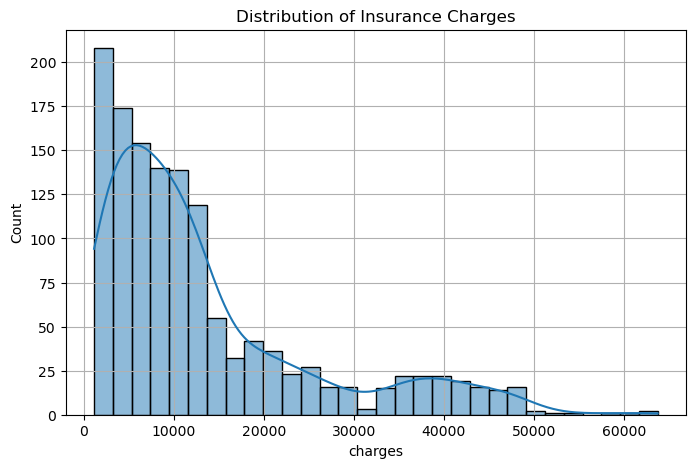

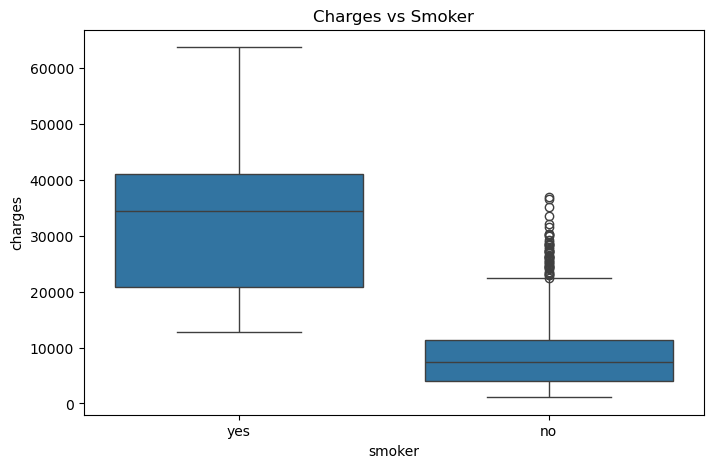

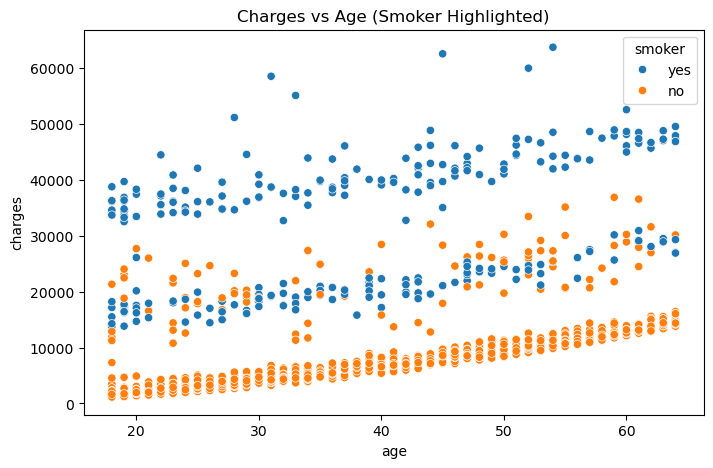

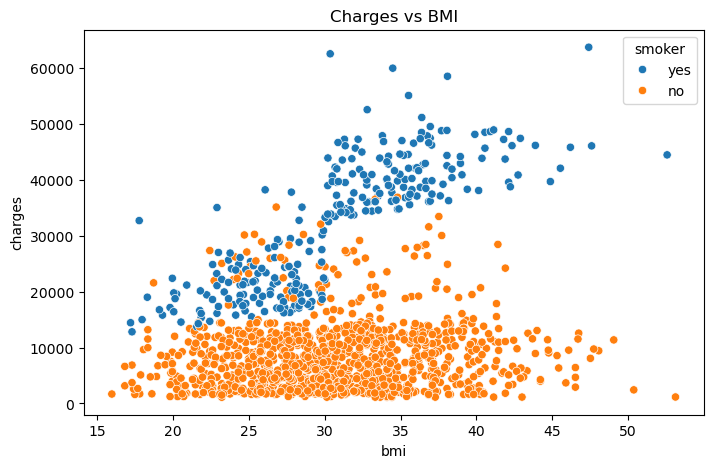

In [43]:
# 3. EDA
plt.figure(figsize=(8,5))
sns.histplot(df["charges"],bins=30,kde=True)
plt.title("Distribution of Insurance Charges")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges vs Smoker")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Charges vs Age (Smoker Highlighted)")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
plt.title("Charges vs BMI")
plt.show()

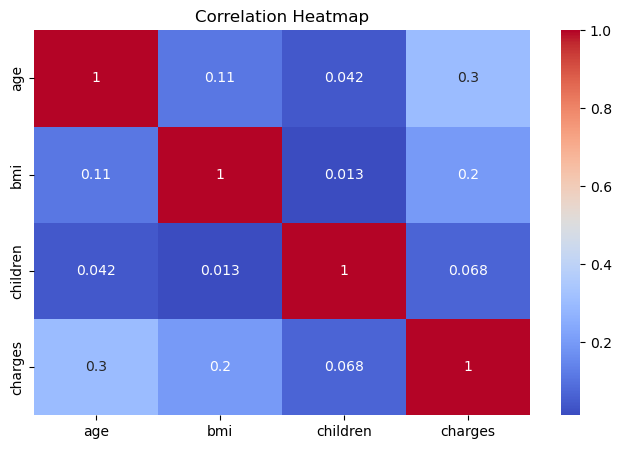

In [25]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
# 4. Encode categorical variables
data_encoded = pd.get_dummies(df, drop_first=True)

In [31]:
# 5. Split into train/test
X = data_encoded.drop("charges", axis=1)
y = data_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# 6. Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# 7. Predictions
y_pred = model.predict(X_test)

In [34]:
# 8. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

Model Performance:
RMSE: 5796.28
R²: 0.784


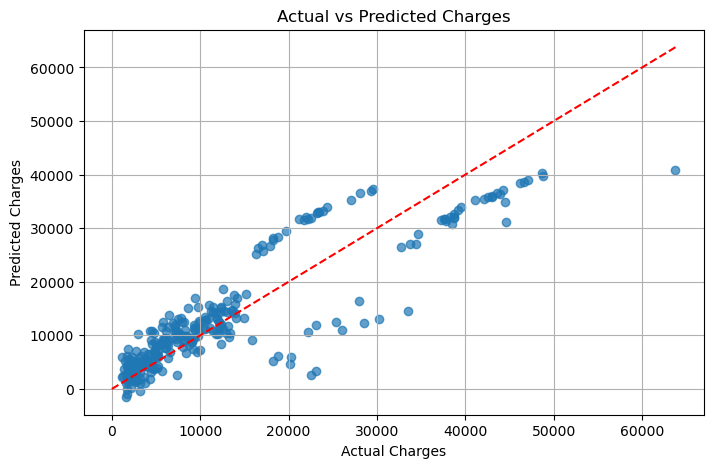

In [37]:
# 9. Visualization: Predictions vs Actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.grid()
plt.show()

In [36]:
# 10. Feature importance (coefficients)
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

            Feature   Coefficient
4        smoker_yes  23651.128856
2          children    425.278784
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354
